# Framework: Crisp-DM
1. Business Understanding
2. Data Understanding
3. Data Prepation
4. Modeling
5. Evaluation
6. Deployment

In [ ]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind

# T-Test (Hypothesis testing)
- One sample T-test
- Two sample (independent) T-Test
- Paired T-Test (dependent)

We are going with a Two Sample Independent T-Test!

Choice Rationale:
- Group Independence 
- Population Hypothesis Unknown (most scenarios for real world research and problems)
- small sample size

Alternative (Z-Test)
- Population standard deviations must be known
- Large sample size

Condition population standard deviation not met.


One Tailed Test
- Testing for change either Increase or Decrease (dependent metric) ie. one or the other.

Two Tailed
- Both increase or decrease (dependent metric)
- We want to test for any change (either increasing or decreasing direction does not matter to research question)

In [ ]:
def one_tailed_t_test_independent(sample1, sample2, alternative='larger', alpha=0.05):
    """
    Performs a one-tailed independent samples t-test using statsmodels.

    Args:
        sample1 (array-like): First independent sample.
        sample2 (array-like): Second independent sample.
        alternative (str, optional): Defines the alternative hypothesis.
            Must be one of {'larger', 'smaller'}.
            'larger': Ha: mean(sample1) > mean(sample2) (right-tailed)
            'smaller': Ha: mean(sample1) < mean(sample2) (left-tailed)
            Defaults to 'larger'.
        alpha (float, optional): Significance level. Defaults to 0.05.

    Returns:
        tuple: (t-statistic, p-value, degrees of freedom, reject_null)
               - t-statistic: The calculated t-statistic.
               - p-value: The one-tailed p-value.
               - degrees of freedom: The degrees of freedom for the t-distribution.
               - reject_null: True if the null hypothesis is rejected, False otherwise.
    """
    if alternative not in ['larger', 'smaller']:
        raise ValueError("The 'alternative' parameter must be 'larger' or 'smaller'.")

    # Use statsmodels' ttest_ind for the t-test
    results = ttest_ind(sample1, sample2, alternative=alternative, usevar='pooled')
    t_statistic, p_value_two_tailed, degrees_of_freedom = results

    # For a one-tailed test, we need to adjust the p-value
    if alternative == 'larger':
        p_value_one_tailed = p_value_two_tailed / 2.
        # Check if the t-statistic supports the alternative hypothesis
        reject_null = p_value_one_tailed < alpha and t_statistic > 0
    elif alternative == 'smaller':
        p_value_one_tailed = p_value_two_tailed / 2.
        # Check if the t-statistic supports the alternative hypothesis
        reject_null = p_value_one_tailed < alpha and t_statistic < 0

    return t_statistic, p_value_one_tailed, degrees_of_freedom, reject_null

### Test Data

In [ ]:
# Example Usage (Independent Samples):
np.random.seed(0)
group_a = np.random.normal(loc=5, scale=2, size=50)
group_b = np.random.normal(loc=4.5, scale=2.5, size=60)

##### Visualization Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


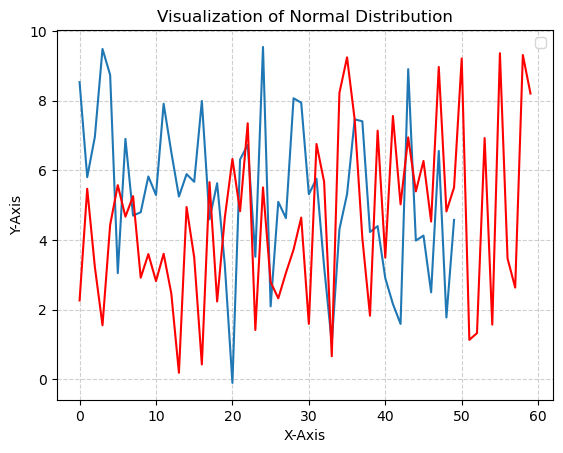

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.plot(group_a)
plt.plot(group_b,color='red')

# Add labels and title
plt.title('Visualization of Normal Distribution')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.show()

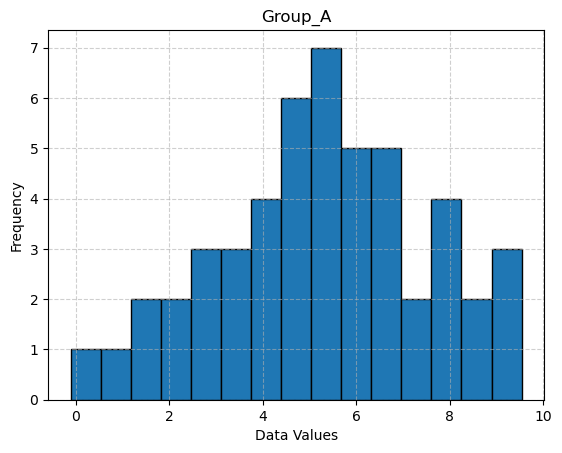

In [ ]:
# Create the histogram
plt.hist(group_a, bins=15, # 'bins' controls the number of bins
         edgecolor='black') # 'edgecolor' adds black borders to the bars
# Add labels and title
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.title('Group_A')
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

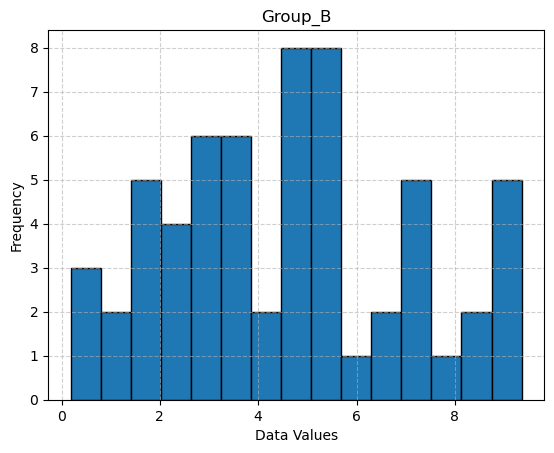

In [ ]:
# Create the histogram
plt.hist(group_b, bins=15, # 'bins' controls the number of bins
         edgecolor='black') # 'edgecolor' adds black borders to the bars
# Add labels and title
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.title('Group_B')
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

# Testing

Function written including hypthosesis definiton parameters!
- 'larger': Ha: mean(sample1) > mean(sample2) (right-tailed)
- 'smaller': Ha: mean(sample1) < mean(sample2) (left-tailed)
- Defaults to 'larger'.

### Evaluation

P-Value
- The p - value is the probability of observing a t-statistic as extreme, or more extreme, than the one calculated from the sample data assuming the Null Hypothesis is TRUE.

(small p-value)
- Small p-value will usually idicates strong evidence against the Null Hypothesis & therefore we fail to reject the Alternative Hyothesis.

(large p-value)
- Large p-value will usually indicate weak evidence against the Null Hypothesis and therefoe we fail to reject the Null hypothesis.

Alpha
- This is the threshold value researchers set in advance of running experimentations usually set at 0.05. 
- 0.05 alpha = 95% confidence level that your observed results are accurate ie. 5% chance of incorrectly concluding that there is a significant difference between variations when no true difference exists in the population level (central limit theorem)
- Research/Industries where there needs to be a very low error rate such as medicine 0.01 would be a common alpha value.
- Research/Industries where for example there is known (minimum) difference between the groups a higher alpha value is recommended.

In [ ]:
# Right-tailed test (Ha: mean(group_a) > mean(group_b))
t_stat_right, p_right, df_right, reject_right = one_tailed_t_test_independent(group_a, group_b, alternative='larger')
print("Independent Samples - Right-tailed:")
print(f"  T-statistic: {t_stat_right:.3f}")
print(f"  P-value (one-tailed): {p_right:.3f}")
print(f"  Degrees of Freedom: {df_right:.1f}")
print(f"  Reject Null Hypothesis: {reject_right}")

# Left-tailed test (Ha: mean(group_a) < mean(group_b))
t_stat_left, p_left, df_left, reject_left = one_tailed_t_test_independent(group_a, group_b, alternative='smaller')
print("\nIndependent Samples - Left-tailed:")
print(f"  T-statistic: {t_stat_left:.3f}")
print(f"  P-value (one-tailed): {p_left:.3f}")
print(f"  Degrees of Freedom: {df_left:.1f}")
print(f"  Reject Null Hypothesis: {reject_left}")

Independent Samples - Right-tailed:
  T-statistic: 1.514
  P-value (one-tailed): 0.033
  Degrees of Freedom: 108.0
  Reject Null Hypothesis: True

Independent Samples - Left-tailed:
  T-statistic: 1.514
  P-value (one-tailed): 0.467
  Degrees of Freedom: 108.0
  Reject Null Hypothesis: False
